
 ✤ Day 1
TechCorp: 98.23
AutoInc: 50.39
PharmaLtd: 69.36
Balance: 1000, Portfolio Value: 1000
Bought 1 shares of PharmaLtd at 69.36

 ✤ Day 2
TechCorp: 101.35
AutoInc: 50.66
PharmaLtd: 69.93
Balance: 930.64, Portfolio Value: 1000.57
Holding...

 ✤ Day 3
TechCorp: 100.91
AutoInc: 50.06
PharmaLtd: 69.86
Balance: 930.64, Portfolio Value: 1000.5
Holding...

 ✤ Day 4
TechCorp: 99.02
AutoInc: 49.73
PharmaLtd: 71.48
Balance: 930.64, Portfolio Value: 1002.12
Bought 1 shares of TechCorp at 99.02

 ✤ Day 5
TechCorp: 99.88
AutoInc: 50.01
PharmaLtd: 74.62
Balance: 831.62, Portfolio Value: 1006.12
Holding...

 ✤ Day 6
TechCorp: 98.93
AutoInc: 49.14
PharmaLtd: 74.84
Balance: 831.62, Portfolio Value: 1005.39
Not enough shares!

 ✤ Day 7
TechCorp: 102.68
AutoInc: 48.2
PharmaLtd: 73.58
Balance: 831.62, Portfolio Value: 1007.88
Holding...

 ✤ Day 8
TechCorp: 106.69
AutoInc: 47.33
PharmaLtd: 72.73
Balance: 831.62, Portfolio Value: 1011.04
Bought 1 shares of AutoInc at 47.33

 ✤ Day 9
TechCorp: 106.06
Au

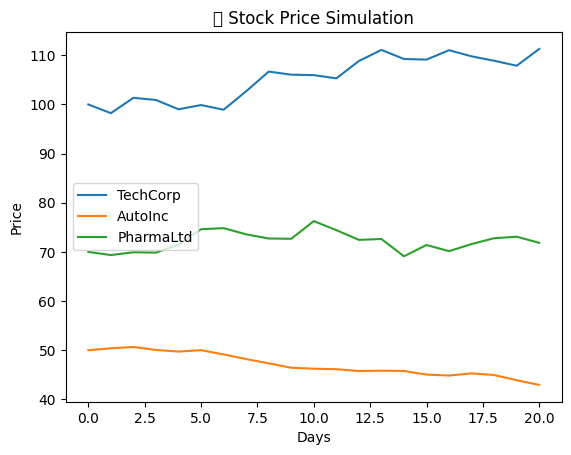

In [2]:
import random
import matplotlib.pyplot as plt

class Stock:
    def __init__(self, name, price, volatility=0.02, trend=0.0):
        self.name = name
        self.price = price
        self.volatility = volatility  #how much it fluctuates
        self.trend = trend            #upward (>0) or downward (<0) bias
        self.history = [price]

    def update_price(self):
        #Random walk with trend
        change_percent = random.uniform(-self.volatility, self.volatility) + self.trend
        self.price *= (1 + change_percent)
        self.price = max(1, round(self.price, 2))  #price can't go below 1
        self.history.append(self.price)


class Portfolio:
    def __init__(self, balance=1000):
        self.balance = balance
        self.holdings = {}  #Stock: number of shares

    def buy(self, stock, qty):
        cost = stock.price * qty
        if self.balance >= cost:
            self.balance -= cost
            self.holdings[stock.name] = self.holdings.get(stock.name, 0) + qty
            print(f"Bought {qty} shares of {stock.name} at {stock.price}")
        else:
            print("Not enough balance!")

    def sell(self, stock, qty):
        if self.holdings.get(stock.name, 0) >= qty:
            self.holdings[stock.name] -= qty
            self.balance += stock.price * qty
            print(f"Sold {qty} shares of {stock.name} at {stock.price}")
        else:
            print("Not enough shares!")

    def portfolio_value(self, market):
        value = self.balance
        for stock_name, qty in self.holdings.items():
            value += market[stock_name].price * qty
        return round(value, 2)


def simulate():
    #Initialize market with few stocks
    market = {
        "TechCorp": Stock("TechCorp", 100, volatility=0.03, trend=0.01),
        "AutoInc": Stock("AutoInc", 50, volatility=0.02, trend=-0.005),
        "PharmaLtd": Stock("PharmaLtd", 70, volatility=0.05, trend=0.0)
    }

    portfolio = Portfolio()

    #Simulation loop
    for day in range(1, 21):  #Simulate 20 days
        print(f"\n ✤ Day {day}")
        for stock in market.values():
            stock.update_price()
            print(f"{stock.name}: {stock.price}")

        print(f"Balance: {portfolio.balance}, Portfolio Value: {portfolio.portfolio_value(market)}")

        #Demo actions: random buy/sell(Can be Replaced with user input)
        action = random.choice(["buy", "sell", "hold"])
        stock_choice = random.choice(list(market.values()))

        if action == "buy":
            portfolio.buy(stock_choice, qty=1)
        elif action == "sell":
            portfolio.sell(stock_choice, qty=1)
        else:
            print("Holding...")

    #Plot stock history
    for stock in market.values():
        plt.plot(stock.history, label=stock.name)
    plt.title("📈 Stock Price Simulation")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    simulate()